In [ ]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv'

df = pd.read_csv(url)

df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)
(1528, 9)
(1307, 9)


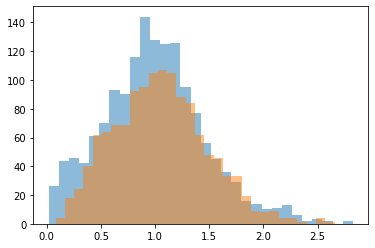

In [30]:
male_snails = df[(df['Sex'] == 'M')]
female_snails = df[(df['Sex'] == 'F')]

plt.hist(male_snails.Whole_weight, bins=30, alpha=0.5)
plt.hist(female_snails.Whole_weight, bins=30, alpha=0.5)

print(stats.describe(male_snails.Whole_weight))
print(stats.describe(female_snails.Whole_weight))

print(male_snails.shape)
print(female_snails.shape)

Does this data meet the assumptions to answer such a question statistically?

Assumptions:

Is the test variable continuous? 
Yes
Are measurements independent?
Yes
Are samples drawn at random?
Yes
Are samples approximately normally distributed?
Yes
Are reasonably large enough samples used?
Yes
Are variances approximately equal?
Yes



What are the formal hypotheses?

We would like to test whether the whole weight of the snail is on average different between male and female snails.

>_h_<sub>0</sub>: The whole weight of  snails is on averare equal between male and female snails.

>_h_<sub>a</sub>: The whole weight of snails is on average different between male and female snails.


Conduct the hypothesis test. What is the p-value? What can you say given the p-value and significance level?

In [23]:
stats.ttest_ind(female_snails['Whole_weight'], male_snails['Whole_weight'])

Ttest_indResult(statistic=3.230536346547456, pvalue=0.0012497207919589404)

After conducting the t-test, we can reject the null hypothesis.

The p-value is 0.001

This means that there is a 0.1% chance of observing a difference as large as what is observed even if the two population means are identical (the null hypothesis is true)

In [24]:
import seaborn as sns

[[Text(0, 0, 'female'), Text(0, 0, 'male')]]

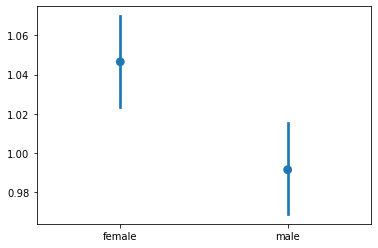

In [26]:
point_plot = sns.pointplot(data=[female_snails['Whole_weight'], male_snails['Whole_weight']], join=False)

point_plot.set(xticklabels=['female', 'male'])
